In [ ]:
import pandas as pd
import seaborn  as sns
sns.set_style('darkgrid')
import string
import nltk
import numpy as np
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from io import StringIO

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Loading the data from GDrive

episode_04 = 'https://drive.google.com/file/d/116qAfMYiwGSXL8O3mPHqyyQaWwEiUDQ2/view?usp=sharing'
episode_05 = 'https://drive.google.com/file/d/1uIWfqPZYVI8ZBRIlqxYS-GU2LqQEDUwE/view?usp=sharing' 
episode_06 = 'https://drive.google.com/file/d/1m6sMJE75U3-jub4qWljeiKQj65uX90go/view?usp=sharing'

# A function to read a csv file shared via google and return a dataframe
#
def read_csv(url):
  url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
  csv_raw = requests.get(url).text
  csv = StringIO(csv_raw)
  df = pd.read_csv(csv, skiprows=1, names=['index', 'character', 'dialogue'], delimiter=' ')
  return df
episode_4 = read_csv(episode_04)
episode_5 = read_csv(episode_05)
episode_6 = read_csv(episode_06)

print('episodes 4, 5, 6 shapes {}, {}, {}'.format(episode_4.shape, episode_5.shape, episode_6.shape))

episodes 4, 5, 6 shapes (1010, 3), (839, 3), (674, 3)


In [ ]:
episode_6.head()

,index,character,dialogue
0,1,SHUTTLE CAPTAIN,"Command station, this is ST 321. Code Clearanc..."
1,2,DEATH STAR CONTROLLER,The security deflector shield will be deactiva...
2,3,SHUTTLE CAPTAIN,We're starting our approach.
3,4,OFFICER,Inform the commander that Lord Vader's shuttle...
4,5,OPERATOR,"Yes, sir."


In [ ]:
# number of characters per script.
episodes = [episode_4, episode_5, episode_6]

for episode in episodes:
  print(episode.character.nunique())
  print('******************************************')

60
******************************************
49
******************************************
53
******************************************


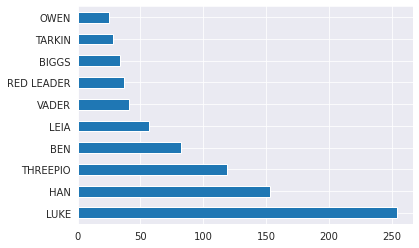

In [ ]:
# Episode 4 character value_counts
episode_4['character'].value_counts()[:10].plot(kind='barh')


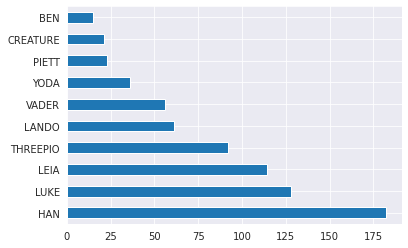

In [ ]:
# Episode 5 character value_counts
episode_5['character'].value_counts()[:10].plot(kind='barh')


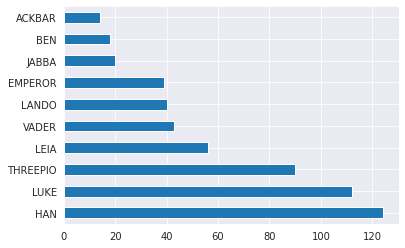

In [ ]:
# Episode 6 character value_counts
episode_6['character'].value_counts()[:10].plot(kind='barh')


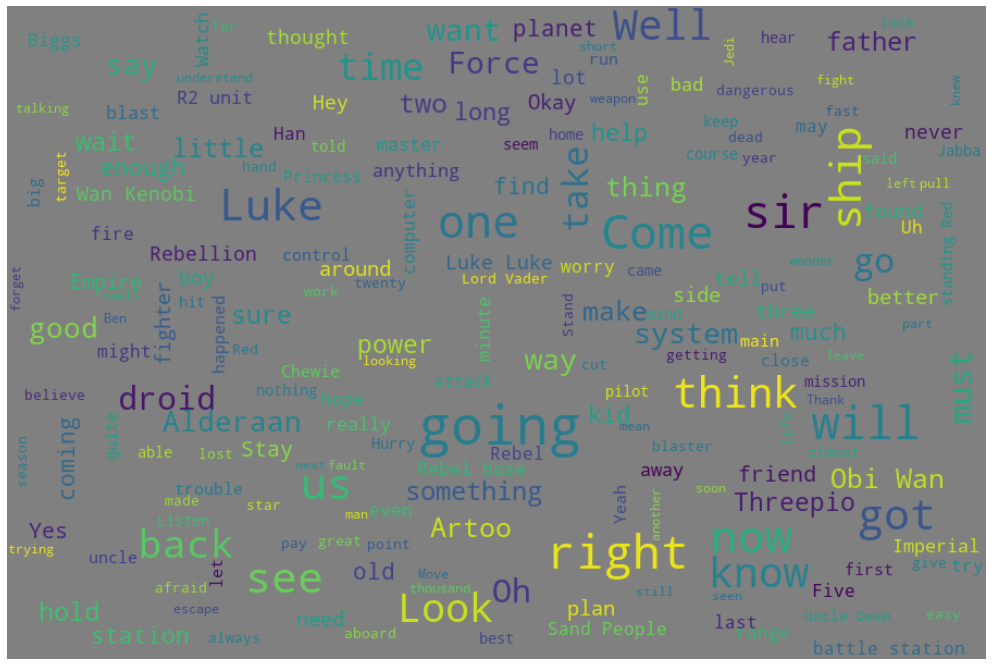

In [ ]:
# Episode 4 wordcloud


all_words = ' '.join([text for text in episode_4['dialogue']])

wordcloud = WordCloud(width=900, height=600, background_color='grey', max_font_size=50).generate(all_words)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

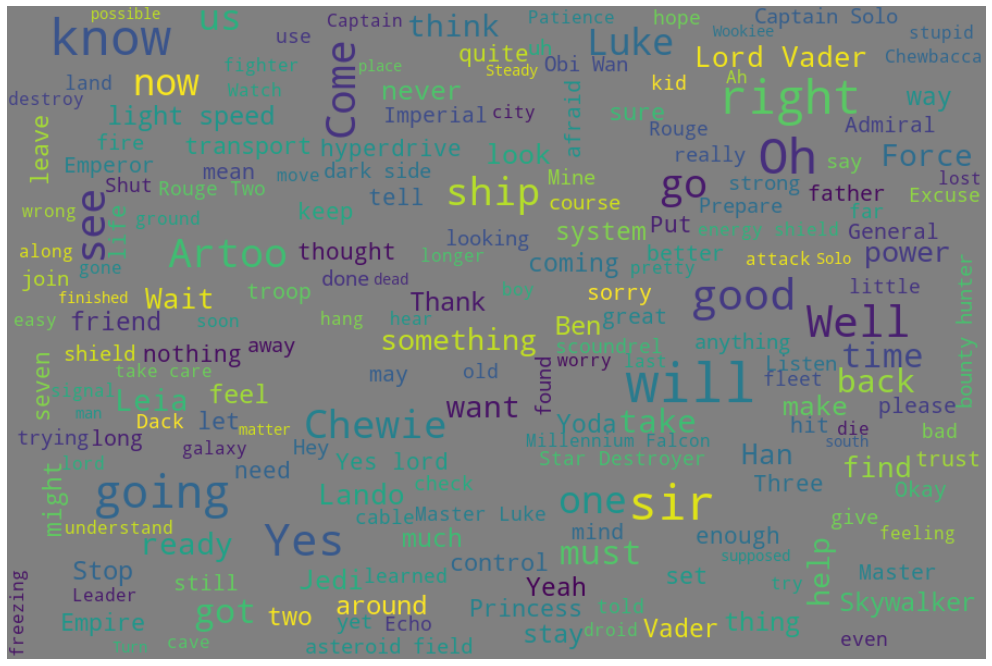

In [ ]:
# Episode 5 wordcloud


all_words = ' '.join([text for text in episode_5['dialogue']])

wordcloud = WordCloud(width=900, height=600, background_color='grey', max_font_size=50).generate(all_words)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

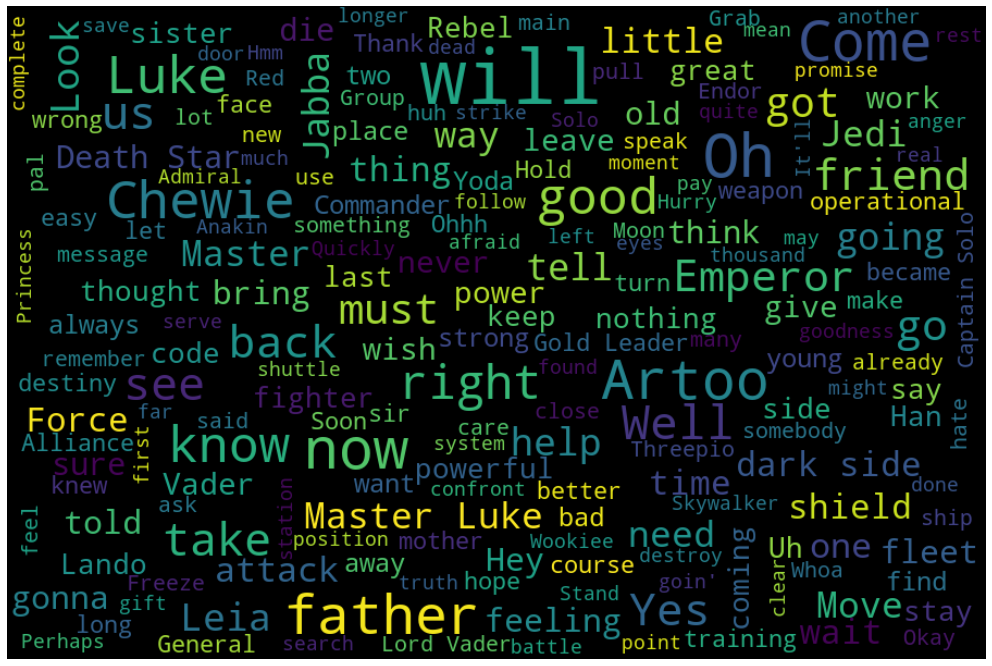

In [ ]:
# Episode 6 wordcloud


all_words = ' '.join([text for text in episode_6['dialogue']])

wordcloud = WordCloud(width=900, height=600, max_font_size=70).generate(all_words)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Frequency Counter

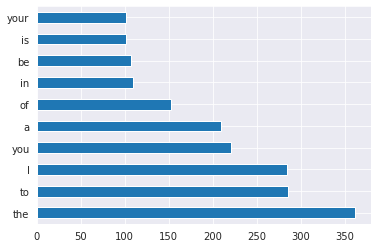

In [ ]:
pd.Series(' '.join(episode_4.dialogue).split()).value_counts()[:10].plot(kind='barh')

## Data preparation

In [ ]:
# Tokenization, removing stopwords, puctuations and lemmatization

nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    text = text.lower()
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in STOPWORDS]
    text = [wn.lemmatize(word) for word in text]
    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# APplying the transformations to all episodes.
for episode in episodes:
  episode['clean_dialogue'] = episode['dialogue'].apply(lambda x: clean_text(x))

In [ ]:
episode_4.head()

,index,character,dialogue,clean_dialogue
0,1,THREEPIO,Did you hear that? They've shut down the main...,"[hear, theyve, shut, main, reactor, well, dest..."
1,2,THREEPIO,We're doomed!,[doomed]
2,3,THREEPIO,There'll be no escape for the Princess this time.,"[therell, escape, princess, time]"
3,4,THREEPIO,What's that?,[whats]
4,5,THREEPIO,I should have known better than to trust the l...,"[known, better, trust, logic, halfsized, therm..."
